In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = '/kaggle/input/competitive-data-science-predict-future-sales'

In [4]:
df_submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))
df_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [5]:
# the test set. You need to forecast the sales for these shops and products for November 2015.
df_test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
df_test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [6]:
# supplemental information about the shops.
df_shops = pd.read_csv(os.path.join(data_dir, 'shops.csv'))
df_shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [7]:
# supplemental information about the items categories.
df_item_categories = pd.read_csv(os.path.join(data_dir, 'item_categories.csv'))
df_item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [8]:
# supplemental information about the items/products.
df_items = pd.read_csv(os.path.join(data_dir, 'items.csv'))
df_items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [9]:
# the training set. Daily historical data from January 2013 to October 2015.
df_train = pd.read_csv(os.path.join(data_dir, 'sales_train.csv'))
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [11]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%d.%m.%Y')
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [13]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [14]:
df_group = pd.DataFrame(df_train.groupby(['shop_id', 'date_block_num'])['item_cnt_day']
                        .sum().reset_index())
df_group

,shop_id,date_block_num,item_cnt_day
0,0,0,5578.0
1,0,1,6127.0
2,1,0,2947.0
3,1,1,3364.0
4,2,0,1146.0
...,...,...,...
1581,59,29,913.0
1582,59,30,992.0
1583,59,31,1214.0
1584,59,32,914.0


In [53]:
df_train[(df_train['date_block_num'] == 0) &
         (df_train['shop_id'] == 25) &
         (df_train['item_id'] == 2552)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [16]:
df_train[(df_train['shop_id'] == 25) &
         (df_train['item_id'] == 2552)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [18]:
train_keys = df_train[['shop_id', 'item_id']].values
train_keys = [tuple(x) for x in train_keys]
len(train_keys)

2935849

In [19]:
train_keys = dict.fromkeys(train_keys)
len(train_keys)

424124

In [20]:
test_keys = df_test[['shop_id', 'item_id']].values
test_keys = [tuple(x) for x in test_keys]
len(test_keys)

214200

In [21]:
test_keys = dict.fromkeys(test_keys)
len(test_keys)

214200

In [22]:
valid, in_valid = 0, 0
for key in test_keys:
    if key in train_keys:
        valid += 1
    else:
        in_valid += 1
valid, in_valid

(111404, 102796)

In [23]:
len(train_keys) + in_valid

526920

In [24]:
all_keys = list(dict.fromkeys(list(train_keys) + list(test_keys)))
len(all_keys)

526920

In [69]:
df_join = df_train.set_index('item_id').join(df_items.set_index('item_id'))
df_join

,date,date_block_num,shop_id,item_price,item_cnt_day,item_name,item_category_id
item_id,,,,,,,
0,2014-09-01,20,54,58.0,1.0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40
1,2014-04-04,15,55,4490.0,1.0,!ABBYY FineReader 12 Professional Edition Full...,76
1,2014-04-02,15,55,4490.0,1.0,!ABBYY FineReader 12 Professional Edition Full...,76
1,2014-07-06,18,55,4490.0,1.0,!ABBYY FineReader 12 Professional Edition Full...,76
1,2014-08-04,19,55,4490.0,1.0,!ABBYY FineReader 12 Professional Edition Full...,76
...,...,...,...,...,...,...,...
22168,2013-02-02,1,42,799.0,1.0,Яйцо для Little Inu,62
22168,2013-02-17,1,16,799.0,1.0,Яйцо для Little Inu,62
22168,2013-03-08,2,43,798.5,1.0,Яйцо для Little Inu,62


In [70]:
df_join = df_join.drop('item_name', axis=1)
df_join = df_join.reset_index()
df_join

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,0,2014-09-01,20,54,58.0,1.0,40
1,1,2014-04-04,15,55,4490.0,1.0,76
2,1,2014-04-02,15,55,4490.0,1.0,76
3,1,2014-07-06,18,55,4490.0,1.0,76
4,1,2014-08-04,19,55,4490.0,1.0,76
...,...,...,...,...,...,...,...
2935844,22168,2013-02-02,1,42,799.0,1.0,62
2935845,22168,2013-02-17,1,16,799.0,1.0,62
2935846,22168,2013-03-08,2,43,798.5,1.0,62
2935847,22168,2013-09-13,8,12,799.0,1.0,62


In [71]:
df_group = df_join.groupby(['item_category_id', 'date_block_num']).agg({'item_price': 'mean', 'item_cnt_day': 'sum'})
df_group

item_price  item_cnt_day
item_category_id date_block_num                          
0                0               148.000000           1.0
                 1                93.000000           1.0
                 3                22.400000           1.0
1                0               148.000000           1.0
                 1               283.000000           1.0
...                                     ...           ...
83               29              133.331522         258.0
                 30              131.178333         298.0
                 31              131.800357         293.0
                 32              137.673030         277.0
                 33              132.672821         348.0

[2077 rows x 2 columns]

In [72]:
df_group = df_group.reset_index()
df_group

,item_category_id,date_block_num,item_price,item_cnt_day
0,0,0,148.000000,1.0
1,0,1,93.000000,1.0
2,0,3,22.400000,1.0
3,1,0,148.000000,1.0
4,1,1,283.000000,1.0
...,...,...,...,...
2072,83,29,133.331522,258.0
2073,83,30,131.178333,298.0
2074,83,31,131.800357,293.0
2075,83,32,137.673030,277.0


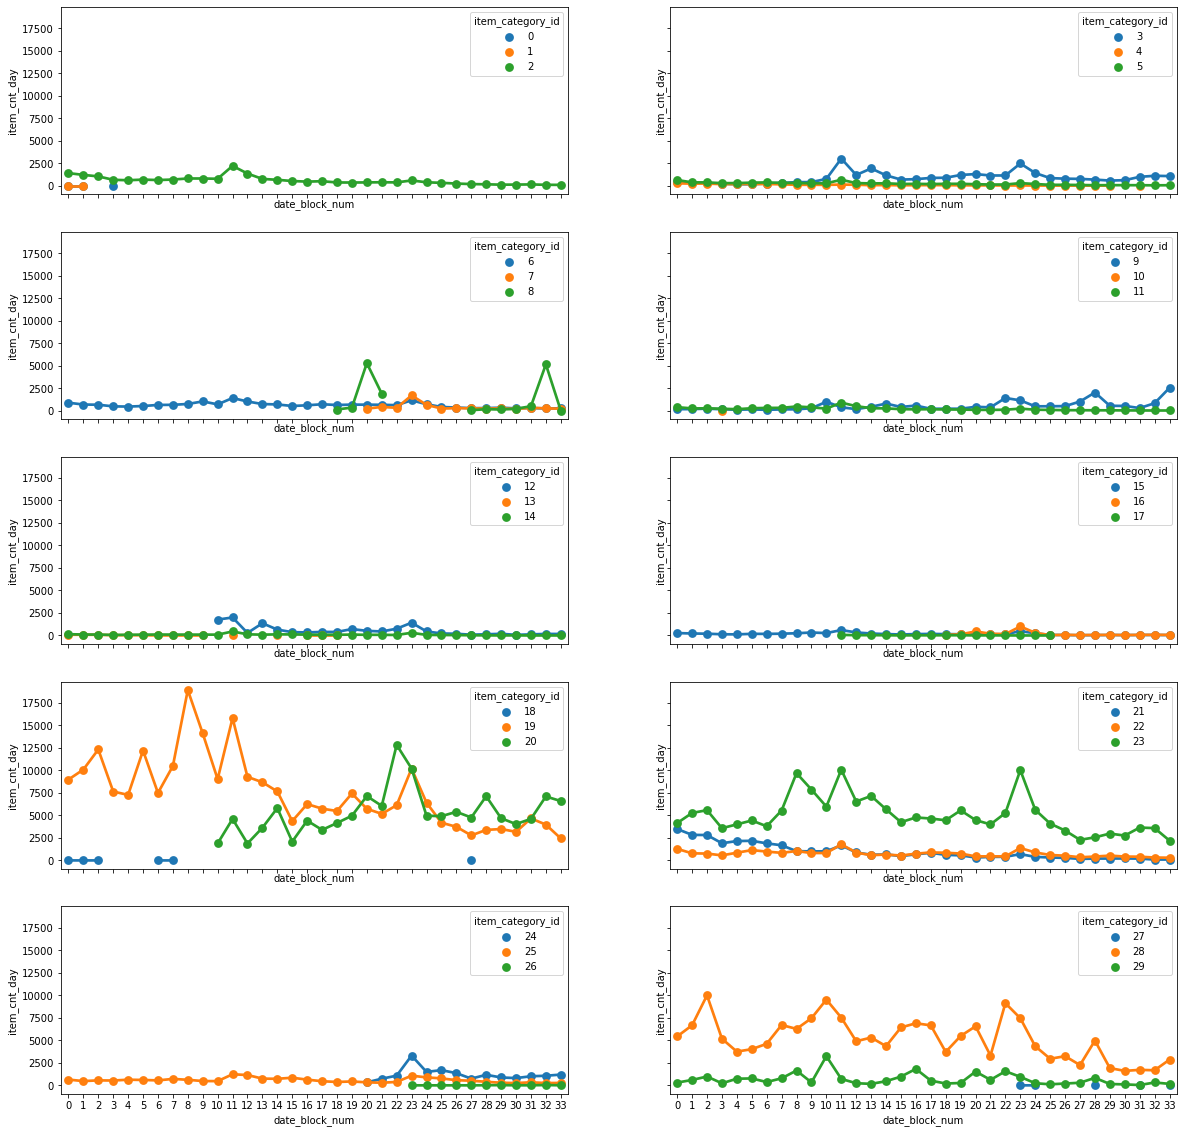

In [73]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(20,20))
n_item = 3
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='item_category_id', data=df_group[(count <= df_group['item_category_id']) & (df_group['item_category_id'] < count + n_item)], ax=axes[i][j])
        count += n_item

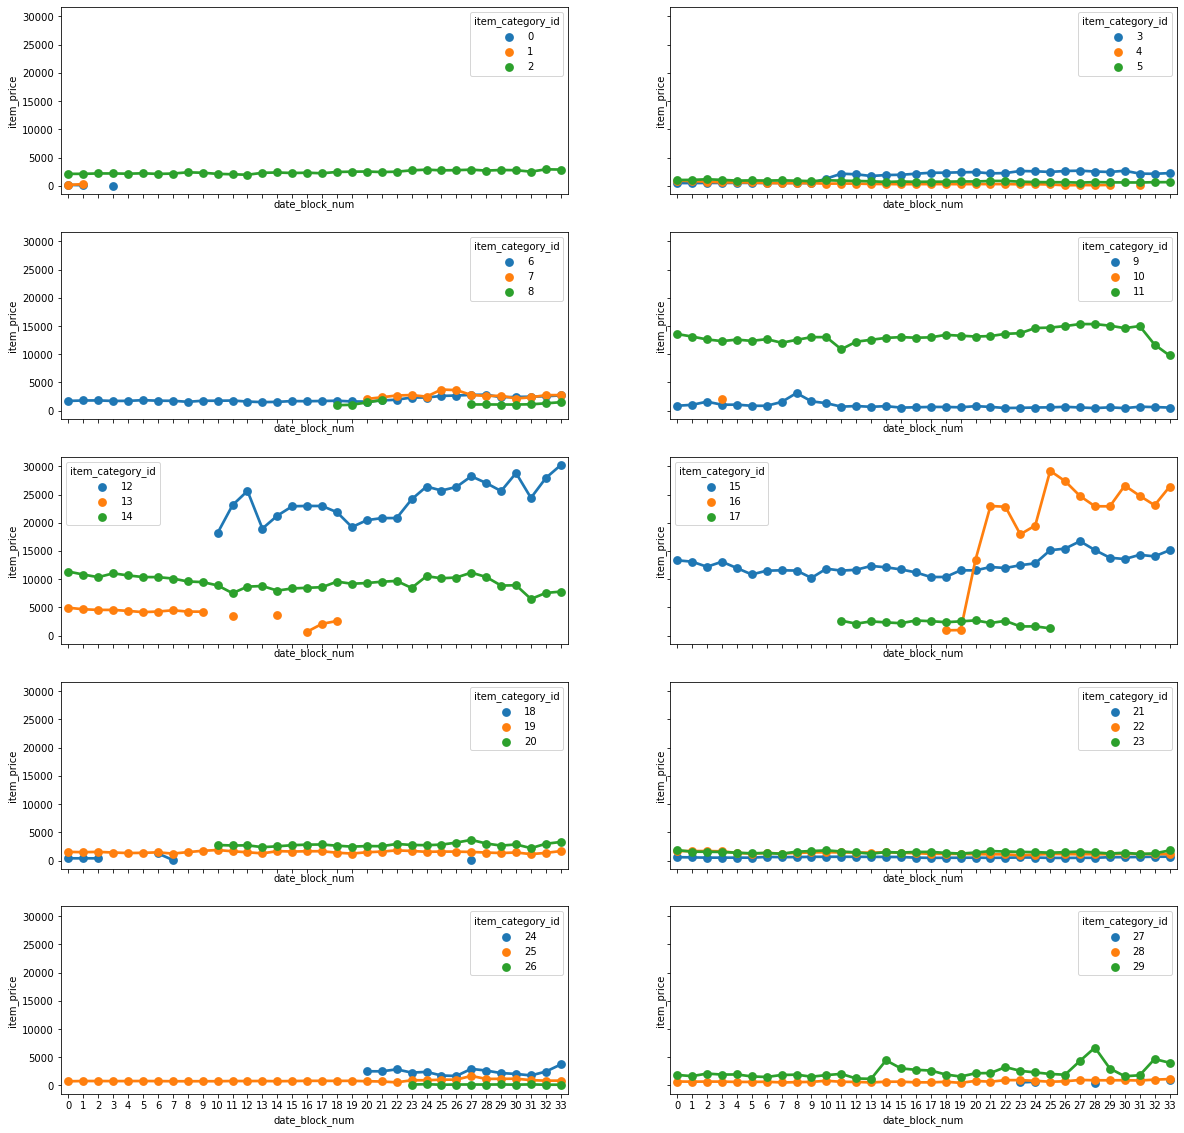

In [74]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(20,20))
n_item = 3
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_price', hue='item_category_id', data=df_group[(count <= df_group['item_category_id']) & (df_group['item_category_id'] < count + n_item)], ax=axes[i][j])
        count += n_item